In [2]:
import numpy as np
import pandas as pd

import yfinance as yf

# About (ROUND 1)
- Tried to use yfinance to bring in quarterly revenue for Ford; however, it only has quarterly revenue going back one year as yfinance is a little more focused on the stock ticker and share price
- So for Ford revenue, I took data from https://www.macrotrends.net/stocks/charts/F/ford-motor/revenue, and typed it into a .csv manually.  
    - **if we scale this for multiple companies, I'll need to reattack to find a better way to get this data 
- downloaded total aircraft operations from FAA Operations Network, https://aspm.faa.gov/opsnet/sys/main.asp. I downloaded it as an excel, switched up the header columns to make the pandas readable, and saved it to a .csv. Then I read it into a df for further manipulation to get the total_flights per quarter
- wrote everything to 'revenue_and_flights.csv' so Andy could read it into the final/big df

- Extra: Added ferrari data for the Ford vs Ferrari idea. However ferrari only goes back to 2nd quarter of 2014
    - source: https://stockanalysis.com/stocks/race/revenue/
    - final .csv from Corey stored in data/corey_ford_ferrari_flights.csv

In [3]:
ford = yf.Ticker('F')

In [4]:
ford.info

{'address1': 'One American Road',
 'city': 'Dearborn',
 'state': 'MI',
 'zip': '48126-1899',
 'country': 'United States',
 'phone': '313 322 3000',
 'website': 'https://www.ford.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'Ford Motor Company develops, delivers, and services a range of Ford trucks, commercial cars and vans, sport utility vehicles, and Lincoln luxury vehicles worldwide. It operates through Ford Blue, Ford Model e, and Ford Pro; Ford Next; and Ford Credit segments. The company sells Ford and Lincoln vehicles, service parts, and accessories through distributors and dealers, as well as through dealerships to commercial fleet customers, daily rental car companies, and governments. It also engages in vehicle-related financing and leasing activities to and through automotive dealers. In addition, the company provides retail installment sale contracts for new and used vehicles; and direc

In [9]:
hist = ford.history(period='3mo')

In [10]:
ford.history_metadata

{'currency': 'USD',
 'symbol': 'F',
 'exchangeName': 'NYQ',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 76253400,
 'regularMarketTime': 1689019200,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 15.07,
 'chartPreviousClose': 12.72,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1688976000,
   'end': 1688995800,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1688995800,
   'end': 1689019200,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1689019200,
   'end': 1689033600,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '3mo',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

In [14]:
ford.quarterly_income_stmt

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Tax Effect Of Unusual Items,-11730000.0,-61200000.0,82002000.0,-486360000.0
Tax Rate For Calcs,0.23,0.4,0.173,0.193
Normalized EBITDA,4147000000.0,5440000000.0,2036000000.0,6614000000.0
Total Unusual Items,-51000000.0,-153000000.0,474000000.0,-2520000000.0
Total Unusual Items Excluding Goodwill,-51000000.0,-153000000.0,474000000.0,-2520000000.0
Net Income From Continuing Operation Net Minority Interest,1757000000.0,1289000000.0,-827000000.0,667000000.0
Reconciled Depreciation,1625000000.0,1700000000.0,1627000000.0,1619000000.0
Reconciled Cost Of Revenue,36855000000.0,37816000000.0,34354000000.0,33191000000.0
EBIT,2471000000.0,3587000000.0,883000000.0,2475000000.0
Net Interest Income,36000000.0,-2121000000.0,-1826000000.0,-1593000000.0


In [17]:
data = ford.history(period='10y', interval='3mo')

In [18]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-07-01 00:00:00-04:00,10.689658,11.147607,9.855312,10.583013,1509789300,0.100,0.0
2013-10-01 00:00:00-04:00,10.683196,11.371010,9.528427,9.736664,2570416400,0.100,0.0
2014-01-01 00:00:00-05:00,9.785923,10.649014,9.138605,9.900156,2333539000,0.125,0.0
2014-04-01 00:00:00-04:00,10.024289,11.099006,9.870758,11.028637,1727823700,0.125,0.0
2014-07-01 00:00:00-04:00,11.179300,11.682175,9.341871,9.535285,1695470000,0.125,0.0


In [23]:
ford = yf.Ticker('F')
quarterly_financials = ford.quarterly_financials
quarterly_financials

,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Tax Effect Of Unusual Items,-11730000.0,-61200000.0,82002000.0,-486360000.0
Tax Rate For Calcs,0.23,0.4,0.173,0.193
Normalized EBITDA,4147000000.0,5440000000.0,2036000000.0,6614000000.0
Total Unusual Items,-51000000.0,-153000000.0,474000000.0,-2520000000.0
Total Unusual Items Excluding Goodwill,-51000000.0,-153000000.0,474000000.0,-2520000000.0
Net Income From Continuing Operation Net Minority Interest,1757000000.0,1289000000.0,-827000000.0,667000000.0
Reconciled Depreciation,1625000000.0,1700000000.0,1627000000.0,1619000000.0
Reconciled Cost Of Revenue,36855000000.0,37816000000.0,34354000000.0,33191000000.0
EBIT,2471000000.0,3587000000.0,883000000.0,2475000000.0
Net Interest Income,36000000.0,-2121000000.0,-1826000000.0,-1593000000.0


# ROUND 2. We are going back 20 years instead of 10
- getting revenue for 3 companies: Ford, Starbucks, ATT
    - ferrari did not go far enough back, nor did GM
- not getting aircraft flights because it wasn't correlated at all with the target before.

Step 1: Read in data from a .csv where I copied and pasted in data from:
- https://stockanalysis.com

In [256]:
# read in the quarterly revenue values I copied and pasted into the .csv
df = pd.read_csv('data/ford_starbucks_att_revenue.csv')

In [257]:
# get rid of B's in revenue columns
for col in df.columns[1:]:
    df[col] = df[col].str.replace('B','')

In [258]:
# cast strings as ints in revenue columns
for col in df.columns[1:]:
    df[col] = df[col].astype(float)

In [259]:
# rename the date column to 'date'
df = df.rename(columns = {'Quarter Ended':'date'})

In [260]:
##### set date column as the index and sort in descending order
df.date = df.date.astype('datetime64')
df = df.set_index('date')
df = df.sort_index(ascending=False)

In [261]:
# now that it's sorted, take out the date from the index and put it back into a column
df= df.reset_index()

In [262]:
# make the 'year' column
df['year'] = df.date.dt.year

In [263]:
# make the quarter column with np.select
conditions = [
  (df.date.dt.month == 3),
  (df.date.dt.month == 6),
  (df.date.dt.month == 9),
  (df.date.dt.month == 12)
]

values = [1, 2, 3, 4]
df["quarter"] = np.select(conditions, values, default=0)
df.head()

,date,Ford,Starbucks,ATT,year,quarter
0,2023-03-31,41.47,8.72,30.14,2023,1
1,2022-12-31,44.00,8.71,31.34,2022,4
2,2022-09-30,39.39,8.41,30.04,2022,3
3,2022-06-30,40.19,8.15,29.64,2022,2
4,2022-03-31,34.48,7.64,29.71,2022,1


In [264]:
# drop date and reorder the columns
df = df[['year', 'quarter', 'Ford', 'Starbucks', 'ATT']]

In [265]:
# rename the columns
df.columns = ['year', 'quarter', 'ford_revenue', 'starbucks_revenue', 'att_revenue']
df.head()

,year,quarter,ford_revenue,starbucks_revenue,att_revenue
0,2023,1,41.47,8.72,30.14
1,2022,4,44.00,8.71,31.34
2,2022,3,39.39,8.41,30.04
3,2022,2,40.19,8.15,29.64
4,2022,1,34.48,7.64,29.71


In [269]:
# add in a row at the top for consistency with other acquisition files
df = df.shift(1)
df.head()

,year,quarter,ford_revenue,starbucks_revenue,att_revenue
0,NaN,NaN,NaN,NaN,NaN
1,2023.0,1.0,41.47,8.72,30.14
2,2022.0,4.0,44.00,8.71,31.34
3,2022.0,3.0,39.39,8.41,30.04
4,2022.0,2.0,40.19,8.15,29.64


In [270]:
df.iloc[0] = [2023, 2, np.nan, np.nan, np.nan]

In [273]:
# the shift turned the year and quarter values into floats for some reason
df.year = df.year.astype(int)
df.quarter = df.quarter.astype(int)

In [275]:
df.tail()

,year,quarter,ford_revenue,starbucks_revenue,att_revenue
77,2004,1,44.72,1.24,10.01
78,2003,4,48.05,1.28,9.72
79,2003,3,36.74,1.08,10.15
80,2003,2,40.58,1.04,10.24
81,2003,1,40.82,0.95,10.38


In [277]:
# make separate df's for ford/starbucks/att
ford = df[['year', 'quarter', 'ford_revenue']]
starbucks = df[['year', 'quarter', 'starbucks_revenue']]
att = df[['year', 'quarter', 'att_revenue']]

In [280]:
# rename revenue column to the same one we've been working with
ford = ford.rename(columns={'ford_revenue': 'total_revenue_B'})
starbucks = starbucks.rename(columns={'starbucks_revenue': 'total_revenue_B'})
att = att.rename(columns={'att_revenue': 'total_revenue_B'})

In [281]:
ford.head()

,year,quarter,total_revenue_B
0,2023,2,NaN
1,2023,1,41.47
2,2022,4,44.00
3,2022,3,39.39
4,2022,2,40.19


In [282]:
starbucks.head()

,year,quarter,total_revenue_B
0,2023,2,NaN
1,2023,1,8.72
2,2022,4,8.71
3,2022,3,8.41
4,2022,2,8.15


In [283]:
att.head()

,year,quarter,total_revenue_B
0,2023,2,NaN
1,2023,1,30.14
2,2022,4,31.34
3,2022,3,30.04
4,2022,2,29.64


# Final statements to write dataframes to .csv's

In [285]:
# write ford/starbucks/att to separate .csv's
ford.to_csv('data/ford_revenue.csv', index=False)
starbucks.to_csv('data/starbucks_revenue.csv', index=False)
att.to_csv('data/att_revenue.csv', index=False)
# write it all to one with the separate column names
df.to_csv('data/ford_starbucks_att_revenue.csv', index=False)

# One more: adding a "engineered target" variable: inflation_adjusted_revenue
- In order to make this column, I'm using the following formula from: [usinflationcalculator.com](https://www.usinflationcalculator.com/frequently-asked-questions-faqs/#HowInflationCalculatorWorks)
    - 1970 Price x (2011 CPI / 1970 CPI) = 2011 Price
- I will make everything be in 2023 Q2 dollars
- will save in separate .csv files ford_adjusted.csv, etc.

In [288]:
cpi = pd.read_clipboard()

In [293]:
ford['cpi'] = cpi.cpi
starbucks['cpi'] = cpi.cpi
att['cpi'] = cpi.cpi

In [295]:
ford.head(2)

,year,quarter,total_revenue_B,cpi
0,2023,2,NaN,305.109
1,2023,1,41.47,301.836


In [299]:
ford.tail(2)

,year,quarter,total_revenue_B,cpi
80,2003,2,40.58,183.7
81,2003,1,40.82,184.2


In [296]:
ford.iloc[0].cpi

305.109

In [301]:
ford['adjusted_revenue_B'] = ford.total_revenue_B * (ford.iloc[0].cpi / ford.cpi)
starbucks['adjusted_revenue_B'] = starbucks.total_revenue_B * (starbucks.iloc[0].cpi / starbucks.cpi)
att['adjusted_revenue_B'] = att.total_revenue_B * (att.iloc[0].cpi / att.cpi)

In [315]:
ford.head()

,year,quarter,total_revenue_B,cpi,adjusted_revenue_B
0,2023,2,NaN,305.109,NaN
1,2023,1,41.47,301.836,41.919686
2,2022,4,44.00,296.797,45.232250
3,2022,3,39.39,296.808,40.491643
4,2022,2,40.19,296.311,41.383312


# Final statements to write .csv files with adjusted_revenue_B columns

In [316]:
# write ford/starbucks/att to separate .csv's
ford[['year', 'quarter', 'adjusted_revenue_B']].to_csv('data/ford_adjusted_revenue.csv', index=False)
starbucks[['year', 'quarter', 'adjusted_revenue_B']].to_csv('data/starbucks_adjusted_revenue.csv', index=False)
att[['year', 'quarter', 'adjusted_revenue_B']].to_csv('data/att_adjusted_revenue.csv', index=False)

In [305]:
# curious about what this looks like
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
# if I want to reverse the dataframe
# either: data.iloc[::-1]
# or if I want to reindex it: data.reindex(index=data.index[::-1])

In [321]:
ford_plot_df = ford.reindex(index = ford.index[::-1])
starbucks_plot_df = starbucks.iloc[::-1]
att_plot_df = att.iloc[::-1]

In [324]:
ford_plot_df = ford_plot_df.reset_index()
ford_plot_df.head()

,index,year,quarter,total_revenue_B,cpi,adjusted_revenue_B
0,81,2003,1,40.82,184.2,67.614275
1,80,2003,2,40.58,183.7,67.399691
2,79,2003,3,36.74,185.2,60.527563
3,78,2003,4,48.05,184.3,79.546866
4,77,2004,1,44.72,187.4,72.809362


In [326]:
starbucks_plot_df = starbucks_plot_df.reset_index()
att_plot_df = att_plot_df.reset_index()

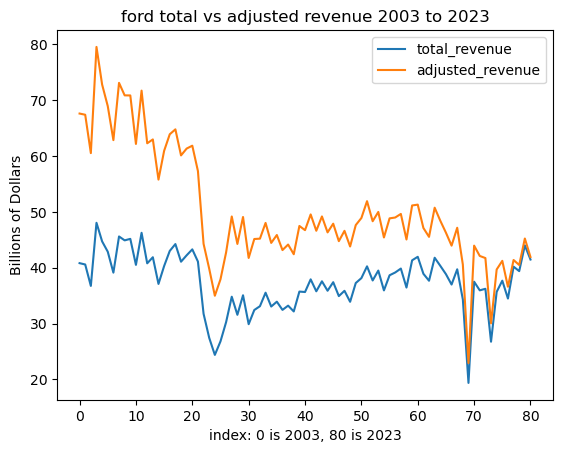

In [334]:
plt.plot(ford_plot_df.total_revenue_B)
plt.plot(ford_plot_df.adjusted_revenue_B)
plt.legend(['total_revenue', 'adjusted_revenue'])
plt.title('ford total vs adjusted revenue 2003 to 2023')
plt.xlabel('index: 0 is 2003, 80 is 2023')
plt.ylabel('Billions of Dollars')
plt.show()

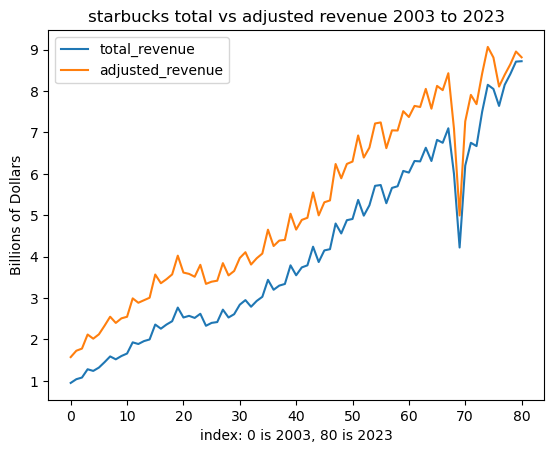

In [333]:
plt.plot(starbucks_plot_df.total_revenue_B)
plt.plot(starbucks_plot_df.adjusted_revenue_B)
plt.legend(['total_revenue', 'adjusted_revenue'])
plt.title('starbucks total vs adjusted revenue 2003 to 2023')
plt.xlabel('index: 0 is 2003, 80 is 2023')
plt.ylabel('Billions of Dollars')
plt.show()

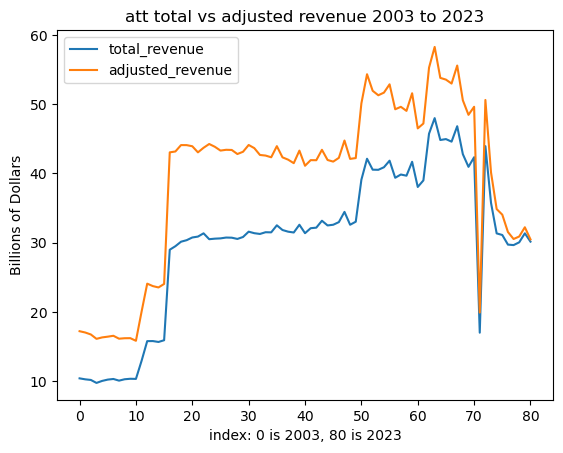

In [335]:
plt.plot(att_plot_df.total_revenue_B)
plt.plot(att_plot_df.adjusted_revenue_B)
plt.legend(['total_revenue', 'adjusted_revenue'])
plt.title('att total vs adjusted revenue 2003 to 2023')
plt.xlabel('index: 0 is 2003, 80 is 2023')
plt.ylabel('Billions of Dollars')
plt.show()

# NOTHING WORTH REVIEWING BELOW
- Below here was round 1, but we eliminated total aircraft flights in the explore phase already

In [85]:
# read acft operations into df from .csv
# I modified the top of the .csv to only include column names prior to reading
df = pd.read_csv('data/acft_operations.csv')

In [86]:
# the end of the .csv file has information we don't need
# find the last_row
last_row = df[df.date == 'Total:'].index[0] - 1
last_row

3621

In [87]:
# get rid of the everything after the last row (save only up to the last row)
df = df.iloc[:last_row+1]
df.tail()

,date,air_carrier,air_taxi,general_aviatiion,military,itinerant_total,local_civil,local_military,local_total,total_operations
3617,5/27/23,"40,222","15,076","40,097",980,"96,375","42,425",189,"42,614","138,989"
3618,5/28/23,"42,225","13,100","32,278",759,"88,362","34,132",270,"34,402","122,764"
3619,5/29/23,"45,293","16,329","39,554",686,"101,862","39,132",164,"39,296","141,158"
3620,5/30/23,"44,010","19,928","46,165","4,373","114,476","56,081","2,932","59,013","173,489"
3621,5/31/23,"46,805","20,203","46,836","5,158","119,002","57,032","4,128","61,160","180,162"


In [89]:
# now total_operations is the only column we want, so drop the rest
df = df[['total_operations']]
df.head()

,total_operations
date,
2013-07-01,"131,892"
2013-07-02,"143,139"
2013-07-03,"152,875"
2013-07-04,"92,965"
2013-07-05,"123,720"


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3622 entries, 2013-07-01 to 2023-05-31
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   total_operations  3622 non-null   object
dtypes: object(1)
memory usage: 56.6+ KB


In [90]:
# change total_operations to a int
df = df.apply(lambda x: x.str.replace(',',''))
df.total_operations = df.total_operations.apply(lambda x: int(x))

In [91]:
df.head()

,total_operations
date,
2013-07-01,131892
2013-07-02,143139
2013-07-03,152875
2013-07-04,92965
2013-07-05,123720


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3622 entries, 2013-07-01 to 2023-05-31
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   total_operations  3622 non-null   int64
dtypes: int64(1)
memory usage: 56.6 KB


In [95]:
# get quarterly sums
df = df.resample('Q').sum() / 2

,total_operations
date,
2013-09-30,6711681.0
2013-12-31,5950785.5
2014-03-31,5692795.0
2014-06-30,6517588.5
2014-09-30,6650777.5


In [99]:
ford['total_flights'] = df.total_operations.astype(int)

In [100]:
ford.head()

,year,quarter,total_revenue_B,total_flights
0,2023,2,NaN,NaN
1,2023,1,41.474,NaN
2,2022,4,43.999,NaN
3,2022,3,39.392,NaN
4,2022,2,40.190,NaN


In [101]:
df.total_operations = df.total_operations.astype(int)

In [103]:
df.head()

,total_operations
date,
2013-09-30,6711681
2013-12-31,5950785
2014-03-31,5692795
2014-06-30,6517588
2014-09-30,6650777


In [105]:
df = df.reset_index()

In [106]:
ford['total_flights'] = df.total_operations

In [107]:
ford.head()

,year,quarter,total_revenue_B,total_flights
0,2023,2,NaN,6711681
1,2023,1,41.474,5950785
2,2022,4,43.999,5692795
3,2022,3,39.392,6517588
4,2022,2,40.190,6650777


In [109]:
ford.to_csv('revenue_and_flights.csv', index=False)

In [110]:
test = pd.read_csv('revenue_and_flights.csv')

In [111]:
test.head()

,year,quarter,total_revenue_B,total_flights
0,2023,2,NaN,6711681
1,2023,1,41.474,5950785
2,2022,4,43.999,5692795
3,2022,3,39.392,6517588
4,2022,2,40.190,6650777


In [123]:
ferrari = pd.read_csv('data/ferrari.csv')

In [124]:
ferrari.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Quarter Ended,Revenue,Change,Growth,NaN,NaN
1,NaN,"Mar 31, 2023",1.55B,249.99M,19.18%,NaN,NaN
2,NaN,"Dec 31, 2022",1.46B,123.46M,9.27%,NaN,NaN
3,NaN,"Sep 30, 2022",1.25B,10.73M,0.87%,NaN,NaN
4,NaN,"Jun 30, 2022",1.36B,128.05M,10.40%,NaN,NaN


In [132]:
ferrari = ferrari.drop(columns = ('Unnamed: 6'))

In [135]:
list = ferrari.iloc[0]

In [137]:
ferrari.columns = ['quarter', 'revenue', 'change', 'growth']

In [140]:
ferrari = ferrari.iloc[1:]

In [144]:
ferrari = ferrari.reset_index()

In [147]:
ferrari = ferrari.drop(columns=['index'])

In [151]:
ferrari = ferrari.apply(lambda x: x.str.replace('B', ''))

In [157]:
ferrari = ferrari.drop(columns = ['change', 'growth'])

In [158]:
ferrari['revenue'] = ferrari.revenue.astype(float)

In [159]:
ferrari.head()

,quarter,revenue
0,"Mar 31, 2023",1.55
1,"Dec 31, 2022",1.46
2,"Sep 30, 2022",1.25
3,"Jun 30, 2022",1.36
4,"Mar 31, 2022",1.30


In [161]:
ferrari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  36 non-null     object 
 1   revenue  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [162]:
ferrari.to_csv('data/ferrari_cleaned.csv')

In [167]:
ferrari = pd.read_csv('data/ferrari_cleaned.csv', index_col=0)

In [168]:
ferrari.head()

,quarter,revenue
0,"Mar 31, 2023",1.55
1,"Dec 31, 2022",1.46
2,"Sep 30, 2022",1.25
3,"Jun 30, 2022",1.36
4,"Mar 31, 2022",1.30


In [169]:
ferrari.tail()

,quarter,revenue
31,"Jun 30, 2015",0.86
32,"Mar 31, 2015",0.67
33,"Dec 31, 2014",0.91
34,"Sep 30, 2014",0.84
35,"Jun 30, 2014",0.99


In [173]:
ford.head()

,year,quarter,total_revenue_B,total_flights
0,2023,2,NaN,6711681
1,2023,1,41.474,5950785
2,2022,4,43.999,5692795
3,2022,3,39.392,6517588
4,2022,2,40.190,6650777


In [174]:
ford['ferrari_revenue'] = ferrari.revenue.shift(1)

In [175]:
ford.head()

,year,quarter,total_revenue_B,total_flights,ferrari_revenue
0,2023,2,NaN,6711681,NaN
1,2023,1,41.474,5950785,1.55
2,2022,4,43.999,5692795,1.46
3,2022,3,39.392,6517588,1.25
4,2022,2,40.190,6650777,1.36


In [176]:
ford.tail()

,year,quarter,total_revenue_B,total_flights,ferrari_revenue
35,2014,3,34.920,6829096,0.84
36,2014,2,37.411,7094930,NaN
37,2014,1,35.876,6378617,NaN
38,2013,4,37.570,6329272,NaN
39,2013,3,35.775,4778529,NaN


In [179]:
ford.iloc[36].ferrari_revenue = .99

/var/folders/mh/rqp8qf2s57730xvg9p4kf6500000gn/T/ipykernel_62539/1574359710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ford.iloc[36].ferrari_revenue = .99


In [180]:
ford.tail()

,year,quarter,total_revenue_B,total_flights,ferrari_revenue
35,2014,3,34.920,6829096,0.84
36,2014,2,37.411,7094930,NaN
37,2014,1,35.876,6378617,NaN
38,2013,4,37.570,6329272,NaN
39,2013,3,35.775,4778529,NaN


In [182]:
list = [f for f in ford.ferrari_revenue]
list

[nan,
 1.55,
 1.46,
 1.25,
 1.36,
 1.3,
 1.33,
 1.24,
 1.23,
 1.19,
 1.3,
 1.06,
 0.64,
 1.04,
 1.04,
 1.01,
 1.12,
 1.07,
 0.97,
 0.96,
 1.08,
 1.02,
 1.01,
 0.99,
 1.05,
 0.88,
 0.88,
 0.88,
 0.99,
 0.76,
 0.81,
 0.81,
 0.86,
 0.67,
 0.91,
 0.84,
 nan,
 nan,
 nan,
 nan]

In [183]:
list[-5]

0.84

In [184]:
list[-4] = .99

In [185]:
list

[nan,
 1.55,
 1.46,
 1.25,
 1.36,
 1.3,
 1.33,
 1.24,
 1.23,
 1.19,
 1.3,
 1.06,
 0.64,
 1.04,
 1.04,
 1.01,
 1.12,
 1.07,
 0.97,
 0.96,
 1.08,
 1.02,
 1.01,
 0.99,
 1.05,
 0.88,
 0.88,
 0.88,
 0.99,
 0.76,
 0.81,
 0.81,
 0.86,
 0.67,
 0.91,
 0.84,
 0.99,
 nan,
 nan,
 nan]

In [186]:
ford.ferrari_revenue = pd.Series(list)

In [187]:
ford.tail()

,year,quarter,total_revenue_B,total_flights,ferrari_revenue
35,2014,3,34.920,6829096,0.84
36,2014,2,37.411,7094930,0.99
37,2014,1,35.876,6378617,NaN
38,2013,4,37.570,6329272,NaN
39,2013,3,35.775,4778529,NaN


In [188]:
df = ford

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             40 non-null     int64  
 1   quarter          40 non-null     int64  
 2   total_revenue_B  39 non-null     float64
 3   total_flights    40 non-null     int64  
 4   ferrari_revenue  36 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 1.7 KB


In [190]:
df.to_csv('data/corey_ford_ferrari_flights.csv')

In [192]:
temp = pd.read_csv('data/corey_ford_ferrari_flights.csv', index_col=0)

In [194]:
temp.head()

,year,quarter,total_revenue_B,total_flights,ferrari_revenue
0,2023,2,NaN,6711681,NaN
1,2023,1,41.474,5950785,1.55
2,2022,4,43.999,5692795,1.46
3,2022,3,39.392,6517588,1.25
4,2022,2,40.190,6650777,1.36


In [196]:
temp.tail()

,year,quarter,total_revenue_B,total_flights,ferrari_revenue
35,2014,3,34.920,6829096,0.84
36,2014,2,37.411,7094930,0.99
37,2014,1,35.876,6378617,NaN
38,2013,4,37.570,6329272,NaN
39,2013,3,35.775,4778529,NaN
